### <center>Fixed-point iteration method for solving the second kind Volterra equation

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

$\lambda = 1, ~K(x, s) = xs, ~f(x) = x, ~a = -1, ~b = 1$

In [2]:
def K(x, s):
    return x * s


def f(x):
    return x


def calc_int(y, x, h, n, K_func, f_func):
    y_k = y.copy()
    for i in range(n):
        y_k[i] = 0
        for j in range(1, i):
            y_k[i] += 2 * K_func(x[i], x[j]) * y[j]
        y_k[i] -= K_func(x[i], x[0]) * y[0] + K_func(x[i], x[i]) * y[i]
        y_k[i] = f_func(x[i]) + h * y_k[i] / 2
    return y_k


def simple_iteration_method(x, epsilon, K_func, f_func):
    n = len(x)
    h = x[1] - x[0]
    y = f_func(x)
    y_k = calc_int(y, x, h, n, K_func, f_func)
    iteration = 0
    residuals = []
    while np.max(np.abs(y - y_k)) / np.max(np.abs(y_k)) > epsilon:
        residuals.append(np.max(np.abs(y - y_k)))
        y = y_k
        y_k = calc_int(y, x, h, n, K_func, f_func)
        iteration += 1
    return y_k, iteration, residuals

In [3]:
n = 10
epsilon = 1e-10
a, b = -1, 1
x = np.linspace(a, b, n + 1)

In [4]:
solution, iterations, discrepancy = simple_iteration_method(x, epsilon, K, f)

In [5]:
print(f"Number_of_iterations: {iterations}")
print(f"Final_discrepancy: {discrepancy[-1]}")

Number_of_iterations: 14
Final_discrepancy: 1.6384005263603285e-10


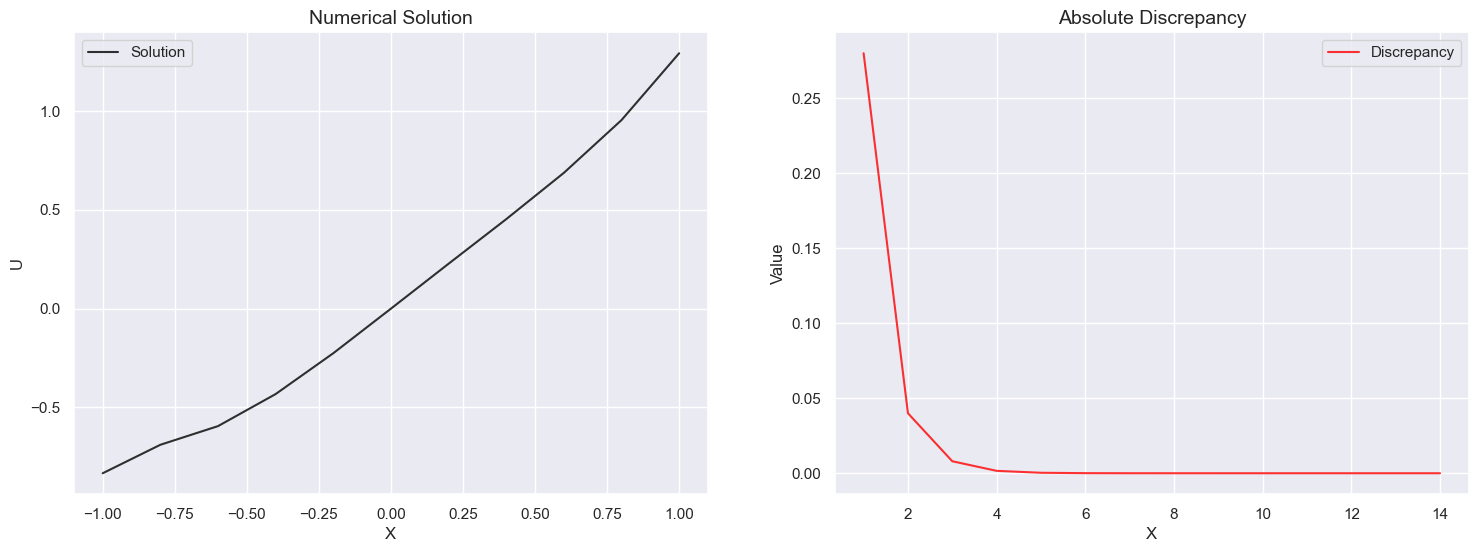

In [6]:
sns.set()
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
sns.lineplot(ax=axs[0], y=solution, x=x, label="Solution", alpha=0.8, c="black");
axs[0].set_xlabel("X", fontsize=12);
axs[0].set_ylabel("U", fontsize=12);
axs[0].set_title("Numerical Solution", fontsize=14);
axs[0].legend();

sns.lineplot(ax=axs[1], y=discrepancy, x=range(1, iterations + 1), label="Discrepancy", alpha=0.8, c="red");
axs[1].set_xlabel("X", fontsize=12);
axs[1].set_ylabel("Value", fontsize=12);
axs[1].set_title("Absolute Discrepancy", fontsize=14);
axs[1].legend();

plt.show()